In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)   
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
with open("data/Data_120294_2023-03-29.csv", "r") as f:
    d = pd.read_csv(f)

d.head()

/tmp/ipykernel_4917/2003393883.py:2: DtypeWarning: Columns (2,64,91,94,97,106,108,109,110,111,112,114,116,119,120,122,127,139,142,143,144,145,152,153,154,155,156,157,159,160,161,163,164,165,169,170,171,172,175,178,179,180,187,189,215,216,217,218,219,317,318) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv(f)


,wl_org,cod_wl,cod_ostxt_wl,num_prev_tx,thoracic_dgn,tah,vas,onvent,icu,inotropic,gender,abo,wgt_kg_tcr,hgt_cm_tcr,bmi_tcr,education,ecmo_tcr,iabp_tcr,inhaled_no,inotropes_tcr,vad_device_ty_tcr,vad_brand1_tcr,vad_brand2_tcr,vad_tah_tcr,func_stat_tcr,tcr_dgn,diab,dial_ty_tcr,cereb_vasc,malig_tcr,malig_ty_tcr,most_rcnt_creat,tot_serum_album,sud_death,impl_defibril,hemo_sys_tcr,hemo_pa_dia_tcr,hemo_pa_mn_tcr,hemo_pcw_tcr,hemo_co_tcr,cig_use,tcr_dur_abstain,prior_card_surg_tcr,histry_cig_old,sternotomy_tcr,ssdmf_death_date,days_stat1,days_stat1a,days_stat2,days_stat1b,days_stata4,days_stata5,days_stata2,days_stata3,days_stata1,days_stata6,init_stat,init_creat,rem_cd,dayswait_chron,end_stat,init_age,life_sup_tcr,activate_date,death_date,end_date,init_date,ethnicity,ethcat,pt_code,init_hgt_cm_calc,init_wgt_kg_calc,init_bmi_calc,end_hgt_cm_calc,end_wgt_kg_calc,end_bmi_calc,composite_death_date,ventilator_tcr,lvad_at_listing,lvad_while_listed,rvad_at_listing,rvad_while_listed,work_income_tcr,academic_prg_tcr,academic_level_tcr,exercise_o2,academic_level_trr,academic_prg_trr,func_stat_trr,med_cond_trr,ecmo_trr,work_income_trr,cognitive_dev_trr,motor_dev_trr,measurement_date_trr,pge_trr,creat_trr,dial_after_list,fev1_trr,fvc_trr,hemo_co_trr,hemo_pa_dia_trr,hemo_pa_mn_trr,hemo_pcw_trr,hemo_sys_trr,iabp_trr,infect_iv_drug_trr,inotropes_trr,inotrop_vaso_co_trr,inotrop_vaso_dia_trr,inotrop_vaso_mn_trr,inotrop_vaso_pcw_trr,inotrop_vaso_sys_trr,pco2_trr,steroid,tbili,transfusions,vad_device_ty_trr,prior_card_surg_type_trr,prior_card_surg_type_ostxt_trr,cmv_status,cod,cod_ostxt,gstatus,gtime,lastfuno,ptime,px_stat,func_stat_trf,amis,bmis,drmis,hlamis,pramr,prapk,pramr_cl1,pramr_cl2,prapk_cl1,prapk_cl2,hist_cocaine_don,age_don,ethcat_don,abo_don,alcohol_heavy_don,gender_don,cod_ostxt_don,bun_don,creat_don,sgot_don,sgpt_don,tbili_don,hypertens_dur_don,cancer_oth_ostxt_don,contin_cig_don,contin_cocaine_don,contin_oth_drug_don,diet_don,diuretics_don,diabdur_don,hist_hypertens_don,hist_cancer_don,hist_insulin_dep_don,hist_diabetes_don,diabetes_don,hist_oth_drug_don,insulin_don,hgt_cm_don_calc,wgt_kg_don_calc,bmi_don_calc,px_stat_date,tx_date,discharge_date,tx_type,abo_mat,age,dial_prior_tx,ischtime,grf_fail_cause,grf_fail_date,grf_stat,age_group,hgt_cm_calc,wgt_kg_calc,bmi_calc,distance,vad_tah_trr,tx_year,referral_date,pco2_don,pulm_cath_don,map_init_don,map_post_don,cvp_cath_init_don,cvp_cath_post_don,cvp_cath_old_don,pcwp_init_don,pcwp_post_don,svr_init_don,svr_post_don,syst_pa_cath_init_don,syst_pa_cath_post_don,systolic_pa_cath_old_don,diast_pa_cath_init_don,diast_pa_cath_post_don,diastolic_pa_cath_old_don,cardiac_output_cath_init_don,cardiac_output_cath_post_don,cardiac_output_cath_old_don,card_idx_init_don,card_idx_post_don,broncho_lt_don,broncho_rt_don,chest_xray_don,ph_don,hematocrit_don,abn_valves_don,abn_lvh_don,abn_congen_don,wall_abn_seg_don,wall_abn_glob_don,data_transplant,data_waitlist,alg_ind,alg_maint,cyclosporin_ind,cyclosporin_maint,okt4_ind,okt4_maint,cytoxan_ind,cytoxan_maint,methotrexate_ind,methotrexate_maint,brequinarsodium_ind,brequinarsodium_maint,mizoribine_ind,mizoribine_maint,atgam_ind,atgam_maint,nratgnrats_ind,nratgnrats_maint,okt3_ind,okt3_maint,xomazymecd5_ind,xomazymecd5_maint,dab486il2_ind,dab486il2_maint,antilfa1_ind,antilfa1_maint,antiicam1_ind,antiicam1_maint,il1receptorantagonist_ind,il1receptorantagonist_maint,antiil6_ind,antiil6_maint,antitnf_ind,antitnf_maint,solubleil1receptor_ind,solubleil1receptor_maint,aldesleukin_ind,aldesleukin_maint,t10b9_ind,t10b9_maint,sandimmune_ind,sandimmune_maint,deoxyspergualin_ind,deoxyspergualin_maint,neoral_ind,neoral_maint,sangcya_ind,sangcya_maint,thymoglobulin_ind,thymoglobulin_maint,zenapax_ind,zenapax_maint,simulect_ind,simulect_maint,gengraf_ind,gengraf_maint,zortress_ind,zortress_maint,eon_ind,eon_maint,myfortic_ind,myfortic_maint,genericcyclosporin_ind,genericcyclosporin_maint,steroids_ind,steroids_maint,prograf_ind,prograf_maint,campath_ind,campath_maint,fty720_in

In [3]:
sample_columns = {
    "gender": "gender", 
    "wgt_kg_tcr": "weight", 
    "bmi_tcr": "bmi", 
    "hgt_cm_tcr": "height", 
    "abo": "blood_type", 
    "init_age": "init_age",
    "data_transplant": "transplanted",
    #"init_date": "start_date",
    #"end_date": "end_date",
    "rem_cd": "reason_removed"
}

d = d[sample_columns.keys()].rename(sample_columns, axis=1)


In [4]:
# date_columns = ["start_date", "end_date"]

# for col in date_columns:
#     d[col] = pd.to_datetime(d[col], format="%d%b%Y")

# d["duration"] = (d.end_date - d.start_date).dt.days
# d.drop(d[d.duration < 0].index, inplace=True)
# d.drop(["start_date", "end_date"], axis=1, inplace=True)

# d.info()

In [5]:
d.bmi.describe()

count   115677.00000
mean        34.62568
std       1472.43018
min          1.92530
25%         22.00720
50%         25.76430
75%         29.70150
max     318008.31020
Name: bmi, dtype: float64

In [6]:
d.bmi.sort_values(ascending=False).head(20)

115520   318008.31020
114754   276457.06370
114853   260207.61250
1303      50833.33330
111478    33257.99950
6730      33058.18180
4715      18611.11110
112048    18140.00000
8113       7920.96830
1228       5554.34310
34208      5509.64190
29988       755.36390
9498        224.48980
7961        204.47530
8662        196.79930
12300       185.17170
17751       175.31040
98691       169.19190
41303       161.22450
2382        158.16010
Name: bmi, dtype: float64

124


/tmp/ipykernel_4917/2649699995.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d.bmi)


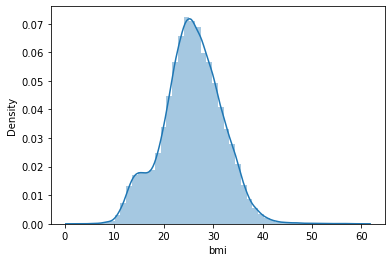

In [7]:
# remove outliers
print(len(d[d.bmi > 60]))

d.drop(d[d.bmi > 60].index, inplace=True)

sns.distplot(d.bmi)
plt.show()

/tmp/ipykernel_4917/4185854147.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[col])


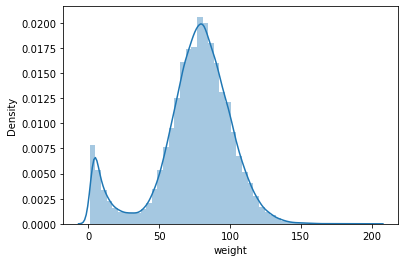

/tmp/ipykernel_4917/4185854147.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[col])


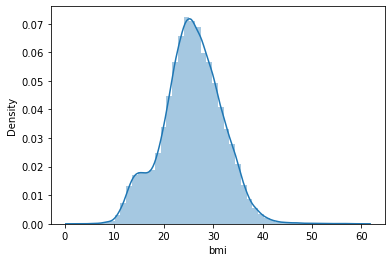

/tmp/ipykernel_4917/4185854147.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[col])


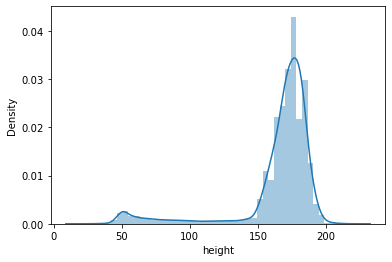

/tmp/ipykernel_4917/4185854147.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d[col])


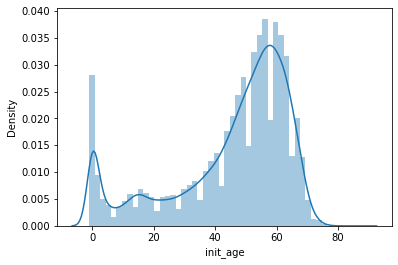

In [8]:
to_normalize = ["weight", "bmi", "height", "init_age"]

for col in to_normalize:
    # plot distribution
    sns.distplot(d[col])
    plt.show()


In [9]:
for col in to_normalize:
    # normalize
    d[col] = (d[col] - d[col].min()) / (d[col].max() - d[col].min())

d[to_normalize].describe()

,weight,bmi,height,init_age
count,116586.00000,115553.00000,115687.00000,120133.00000
mean,0.36868,0.40904,0.71465,0.52631
std,0.13762,0.10431,0.14782,0.21954
min,0.00000,0.00000,0.00000,0.00000
25%,0.31407,0.34569,0.70584,0.43182
50%,0.38693,0.41040,0.75309,0.60227
75%,0.45377,0.47827,0.79012,0.68182
max,1.00000,1.00000,1.00000,1.00000


In [10]:
label_columns = ["gender", "blood_type", "transplanted", "reason_removed"]

for col in label_columns:
    print(d[col].value_counts())

M    88679
F    31461
Name: gender, dtype: int64
O      52860
A      46185
B      15598
AB      5162
A1       241
A2        55
A1B       20
A2B       14
Z          5
Name: blood_type, dtype: int64
Y    77341
N    42799
Name: transplanted, dtype: int64
4.00000     76683
8.00000     16888
9.00000      6316
12.00000     6212
13.00000     4999
7.00000      1899
5.00000       943
6.00000       846
14.00000      614
3.00000       505
24.00000      373
16.00000      114
21.00000       96
18.00000       49
15.00000       43
20.00000        5
22.00000        3
2.00000         3
Name: reason_removed, dtype: int64


In [11]:
d["is_male"] = d.apply(lambda row: row["gender"] == "M", axis=1)

d["blood_A"] = d.apply(lambda row: row["blood_type"] == "A", axis=1)
d["blood_B"] = d.apply(lambda row: row["blood_type"] == "B", axis=1)
d["blood_AB"] = d.apply(lambda row: row["blood_type"] == "AB", axis=1)
d["blood_O"] = d.apply(lambda row: row["blood_type"] == "O", axis=1)

d["transplanted"] = d.apply(lambda row: row["transplanted"] == "Y", axis=1)
d["died"] = d.apply(lambda row: row["reason_removed"] == 8, axis=1)
d["result_label"] = d.apply(lambda row: 0 if row["transplanted"] else 1 if row["died"] else 2, axis=1)

d = d.drop(["gender", "blood_type", "reason_removed", "transplanted", "died"], axis=1)

In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120140 entries, 0 to 120263
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   weight        116586 non-null  float64
 1   bmi           115553 non-null  float64
 2   height        115687 non-null  float64
 3   init_age      120133 non-null  float64
 4   is_male       120140 non-null  bool   
 5   blood_A       120140 non-null  bool   
 6   blood_B       120140 non-null  bool   
 7   blood_AB      120140 non-null  bool   
 8   blood_O       120140 non-null  bool   
 9   result_label  120140 non-null  int64  
dtypes: bool(5), float64(4), int64(1)
memory usage: 6.1 MB


In [13]:
# Print percentage of missing values
d.isnull().sum() * 100 / len(d)

weight         2.95822
bmi            3.81805
height         3.70651
init_age       0.00583
is_male        0.00000
blood_A        0.00000
blood_B        0.00000
blood_AB       0.00000
blood_O        0.00000
result_label   0.00000
dtype: float64

In [14]:
# Remove rows with missing values
d.dropna(inplace=True)

In [15]:
d["result_label"].value_counts()

0    75798
2    24304
1    15449
Name: result_label, dtype: int64

Accuracy:  0.6564490445859873


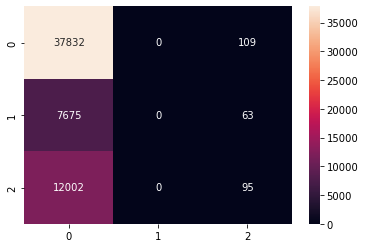

Classification Report:                precision    recall  f1-score   support

           0       0.66      1.00      0.79     37941
           1       0.00      0.00      0.00      7738
           2       0.36      0.01      0.02     12097

    accuracy                           0.66     57776
   macro avg       0.34      0.33      0.27     57776
weighted avg       0.51      0.66      0.52     57776



/home/wilmer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wilmer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wilmer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# fit multinomial logistic regression model (transplant/death/neither)
X = d.drop(["result_label"], axis=1)
y = d["result_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

lr = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print("Classification Report: ", classification_report(y_test, y_pred))


Accuracy:  0.6564836610357242


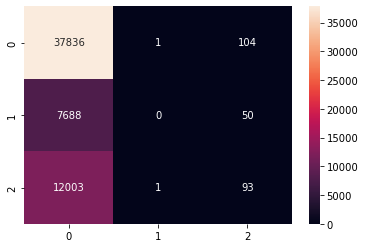

Classification Report:                precision    recall  f1-score   support

           0       0.66      1.00      0.79     37941
           1       0.00      0.00      0.00      7738
           2       0.38      0.01      0.02     12097

    accuracy                           0.66     57776
   macro avg       0.34      0.33      0.27     57776
weighted avg       0.51      0.66      0.52     57776



In [17]:
# Random forest classification

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8, criterion="entropy", min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print("Classification Report: ", classification_report(y_test, y_pred))

Accuracy:  0.6566913597341457


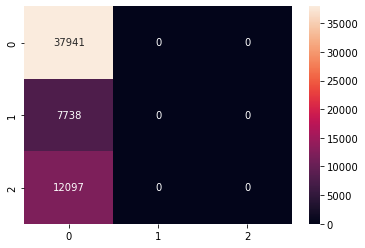

Classification Report:                precision    recall  f1-score   support

           0       0.66      1.00      0.79     37941
           1       0.00      0.00      0.00      7738
           2       0.00      0.00      0.00     12097

    accuracy                           0.66     57776
   macro avg       0.22      0.33      0.26     57776
weighted avg       0.43      0.66      0.52     57776



/home/wilmer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wilmer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wilmer/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# Support vector machine classification

from sklearn.svm import SVC

svm = SVC(kernel="rbf", gamma="auto")
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

print("Classification Report: ", classification_report(y_test, y_pred))

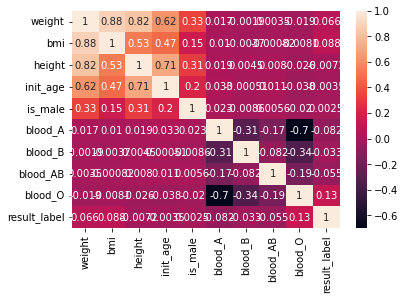

In [25]:
# Correlation matrix

corr = d.corr()
sns.heatmap(corr, annot=True)
plt.show()
